<h1 style=color:yellow>F_Graphs: A tool for elementar mathematical function graphs classification</h1>

<h3 style=color:yellow>Load packages</h3>

In [1]:
# Load libraries 
from keras.models import load_model # !pip install keras
import matplotlib.pyplot as plt #pip install matplotlib
import numpy as np  #pip install numpy
import pickle
import random
import cv2 #!pip install opencv

<h3 style=color:yellow>Load dataset</h3>

In [2]:
# Load Dataset 
with open('dataset/dataset.pkl','rb') as f:
    data = pickle.load(f)

(xt,yt),(xv,yv),(teste,label) = data
del xt
del yt
del xv
del yv
teste = teste.astype('uint8')
teste = np.array([image.reshape((128, 128, 3)) for image in teste])

<h3 style=color:yellow>Load model</h3>

In [ ]:
# Carregar o modelo treinado
GF_Model = load_model('model/LID_gf_modelV7.keras')

# Fazer previsões
predictions = GF_Model.predict(teste)

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step


<h3 style=color:yellow>Make predictions with images from the dataset</h3>

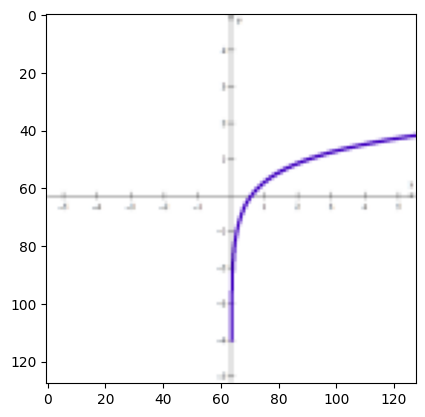

Previsão do modelo: logarítmica
Resposta esperada: logarítmica


In [8]:
# Visualizar  as imagens
img_nr = random.randint(0, teste.shape[0])

plt.imshow(teste[img_nr].reshape(128,128,3))
plt.show()

classes = {0:'linear', 1: 'quadrática', 2:'cúbica', 3:'exponencial', 4:'logarítmica',
                    5:'raíz', 6:'seno', 7:'cosseno', 8:'tangente', 9:'cotangente'}

print('Previsão do modelo:', classes[np.argmax(predictions[img_nr])])
print('Resposta esperada:' , classes[np.argmax(label[img_nr])])

<h3 style=color:yellow>Make predictions with images from the internet</h3>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


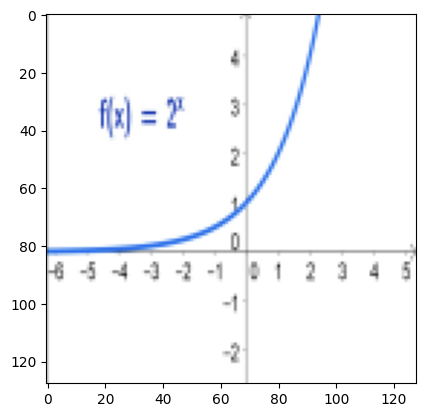

É uma função  exponencial


In [12]:
# Visualizar  as imagens
img_url= "demo_imgs/func0.png" # substitua aqui o caminho correto para a imagem
imagem = cv2.imread(img_url)
imagem = cv2.resize(imagem,(128,128), interpolation = cv2.INTER_AREA)
discover = np.argmax(GF_Model.predict(imagem.reshape(1,128,128,3)))

plt.imshow(imagem)
plt.show()

classes = {0:'linear', 1: 'quadrática', 2:'cúbica', 3:'exponencial', 4:'logarítmica',
                    5:'raíz', 6:'seno', 7:'cosseno', 8:'tangente', 9:'cotangente'}

print('É uma função ', classes[discover])